In [1]:
# -*- coding: utf-8 -*-
# 使用LR进行MNIST手写数字分类
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.metrics import classification_report
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


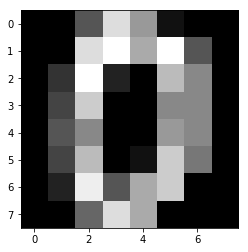

In [2]:
# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

In [4]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [5]:
# 创建LR分类器
lr = LogisticRegression()
lr.fit(train_ss_x, train_y)
predict_y=lr.predict(test_ss_x)
print('LR准确率: %0.4lf' % accuracy_score(predict_y, test_y))

LR准确率: 0.9600


C:\Users\ading\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ading\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [8]:
# fit a CART model to the data
cart = DecisionTreeClassifier()
cart.fit(train_ss_x, train_y)
print(cart)
# make predictions
predict_y_new = cart.predict(test_ss_x)
# summarize the fit of the model
print('CART准确率: %0.4lf' % accuracy_score(predict_y_new, test_y))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
CART准确率: 0.8556


In [15]:
model ={
    'MLP': MLPClassifier(),
    'KNC': KNeighborsClassifier(),
    'SVC': SVC(),
    'GPC': GaussianProcessClassifier(),
    'DTC': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'ExtraTree': ExtraTreesClassifier(),
    'GraBoost': GradientBoostingClassifier(),
    'logreg': LogisticRegression()

}

In [16]:
prediction_accuracy = []
for value in model.values():
    value.fit(train_ss_x, train_y)
    predict_y_new = value.predict(test_ss_x)
#    print('{}准确率： %0.4lf'.format(value) % accuracy_score(predict_y_new, test_y))
    prediction_accuracy.append(accuracy_score(predict_y_new, test_y))

C:\Users\ading\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ading\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ading\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ading\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfg

In [17]:
model_prediction = np.hstack(prediction_accuracy)
#加入list将dict_keys转换为列表，否则会在后续画图中报错
model_name = np.hstack((list(model.keys())))

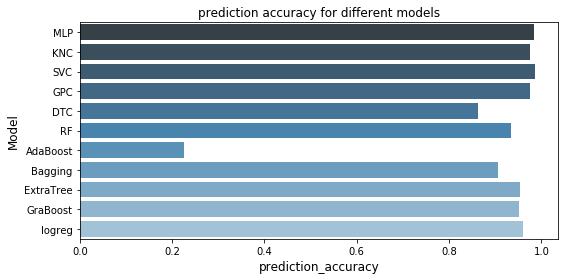

In [26]:
fig = plt.figure(figsize=(8,4))

sns.barplot(model_prediction, model_name, palette='Blues_d')

plt.xticks(rotation=0, size = 10)
plt.xlabel("prediction_accuracy", fontsize = 12)
plt.ylabel("Model", fontsize = 12)
plt.title("prediction accuracy for different models")

plt.tight_layout()
plt.savefig('prediction accuracy.png')

In [8]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [16]:
DTC = DecisionTreeClassifier()
scores = cross_val_score(DTC, digits.data, digits.target, cv = 5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.79120879 0.72099448 0.79665738 0.83473389 0.7943662 ]


In [12]:
target = digits.target
target.shape

(1797,)